<a href="https://colab.research.google.com/github/DarekGit/automl/blob/master/efficientdet/faces_test_EfficientDet_D7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test of EfficientDet with Faces datasets 



<table align="left"><td>
  <a target="_blank"  href="https://github.com/DarekGit/automl/blob/master/efficientdet/faces_test_EfficientDet.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on github
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/DarekGit/automl/blob/master/efficientdet/faces_test_EfficientDet.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td></table>

<br><br><br><br><br><br>

https://github.com/DarekGit/automl/tree/master/efficientdet

# 0. Install.

## 0.1 Install package and download source code/image.



In [1]:
!nvidia-smi

Sun Dec  6 12:24:04 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    24W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# OUTPUT_DIR on gdrive (Google Drive) or tmp
import os

output='gdrive' # @param gdrive for google drive

if output == 'gdrive':
  from google.colab import drive
  drive.mount('/content/drive')

  OUTPUT_DIR = os.path.join("/content/drive/My Drive/", "tmp")
  os.makedirs(OUTPUT_DIR, exist_ok=True)
else:
  OUTPUT_DIR = output 


Mounted at /content/drive


In [3]:
#originally https://github.com/google/automl
%%capture
#@title
import os
import sys
import tensorflow.compat.v1 as tf

# Download source code.
if "efficientdet" not in os.getcwd():
  !git clone --depth 1 https://github.com/DarekGit/automl
  os.chdir('automl/efficientdet')
  sys.path.append('.')
  !pip install -r requirements.txt
  !pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
else:
  !git pull

In [4]:
from PIL.Image import Image

MODEL = 'efficientdet-d7'  # @param

def download(m):
  if m not in os.listdir():
    !wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/{m}.tar.gz
    !tar zxf {m}.tar.gz
  ckpt_path = os.path.join(os.getcwd(), m)
  return ckpt_path

# Download checkpoint.
ckpt_path = download(MODEL)
print('Use model in {}'.format(ckpt_path))


min_score_thresh = 0.35  #@param
max_boxes_to_draw = 2000  #@param
line_thickness =   2. #@param



--2020-12-06 12:24:59--  https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/efficientdet-d7.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413468440 (394M) [application/x-tar]
Saving to: ‘efficientdet-d7.tar.gz’

efficientdet-d7.tar 100%[===================>] 394.31M  56.2MB/s    in 7.0s    

2020-12-06 12:25:07 (56.2 MB/s) - ‘efficientdet-d7.tar.gz’ saved [413468440/413468440]

Use model in /content/automl/efficientdet/efficientdet-d7


## 0.2 Datasets download

In [5]:
#WiderFace datasets downwload
import os
def Wider_load(val=True,train=True,test=False):
  os.makedirs('WIDER/', exist_ok=True)

  if val:
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDd3dIRmpvSk8tLUk
    !gdown https://drive.google.com/uc?id=1-5A_pa_jDS7gk8mHVCBB7ApV5KN8jWDr -O WIDER/tempv.zip
    !unzip -q WIDER/tempv.zip -d WIDER
    !rm WIDER/tempv.zip  

  if train:
    ### WIDER Face Training Images
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDQUUwd21EckhUbWs
    !gdown https://drive.google.com/uc?id=1-1iJfmXKYvAx9uLdRDX5W6HHG_KZv1jH -O WIDER/temptr.zip
    !unzip -q WIDER/temptr.zip -d WIDER
    !rm WIDER/temptr.zip
  
  if test:
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDbW4tdGpaYjgzZkU
    !gdown https://drive.google.com/uc?id=1tTpUJZEQMKDVxKT6100V5FwDuGX_8sDi -O WIDER/tempt.zip
    !unzip -q WIDER/tempt.zip -d WIDER
    !rm WIDER/tempt.zip


  ### Face annotations
  !wget mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip -O WIDER/tempa.zip
  !unzip -q WIDER/tempa.zip -d WIDER
  !rm WIDER/tempa.zip


  ### Examples and formats of the submissions
  #!wget mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/example/Submission_example.zip

Wider_load(val=True,train=True,test=False)

Downloading...
From: https://drive.google.com/uc?id=1-5A_pa_jDS7gk8mHVCBB7ApV5KN8jWDr
To: /content/automl/efficientdet/WIDER/tempv.zip
363MB [00:02, 150MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1iJfmXKYvAx9uLdRDX5W6HHG_KZv1jH
To: /content/automl/efficientdet/WIDER/temptr.zip
1.47GB [00:08, 170MB/s]
--2020-12-06 12:26:09--  http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip
Resolving mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)... 137.189.99.12
Connecting to mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)|137.189.99.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3591642 (3.4M) [application/zip]
Saving to: ‘WIDER/tempa.zip’

WIDER/tempa.zip     100%[===================>]   3.42M  1.43MB/s    in 2.4s    

2020-12-06 12:26:13 (1.43 MB/s) - ‘WIDER/tempa.zip’ saved [3591642/3591642]



In [6]:
#Faces_DD dataset download  - hi-res
import json
!gdown 'https://drive.google.com/uc?export=download&id=1XwVm-2EMFdy9Zq39pKFr5UoSJvgTOm-7' 
!unzip -oq Faces_DD.zip
!rm Faces_DD.zip
!gdown 'https://drive.google.com/uc?export=download&id=1gIIUK518Ft9zi3VDVQZLRVozI-Hkpgt2' -O Annotations.json


Downloading...
From: https://drive.google.com/uc?export=download&id=1XwVm-2EMFdy9Zq39pKFr5UoSJvgTOm-7
To: /content/automl/efficientdet/Faces_DD.zip
2.37GB [00:24, 97.3MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1gIIUK518Ft9zi3VDVQZLRVozI-Hkpgt2
To: /content/automl/efficientdet/Annotations.json
100% 336k/336k [00:00<00:00, 49.1MB/s]


# 1. Training EfficientDet on WIDER FACE.




## 1.1 Data preparation

In [7]:
!mkdir tfrecord
!PYTHONPATH=".:$PYTHONPATH"  python dataset/create_wider_tfrecord.py  \
  --data_dir=''   --output_path=tfrecord/wider

2020-12-06 12:27:44.409770: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
I1206 12:27:45.885562 139707544348544 create_wider_tfrecord.py:209] Writing to output directory: tfrecord
train 12880
I1206 12:27:47.688786 139707544348544 create_wider_tfrecord.py:234] Reading from WIDER train dataset.
I1206 12:27:47.689610 139707544348544 create_wider_tfrecord.py:239] On image 0 of 12880
I1206 12:27:48.896669 139707544348544 create_wider_tfrecord.py:239] On image 1000 of 12880
I1206 12:27:50.023313 139707544348544 create_wider_tfrecord.py:239] On image 2000 of 12880
I1206 12:27:51.098412 139707544348544 create_wider_tfrecord.py:239] On image 3000 of 12880
I1206 12:27:52.410887 139707544348544 create_wider_tfrecord.py:239] On image 4000 of 12880
I1206 12:27:53.512918 139707544348544 create_wider_tfrecord.py:239] On image 5000 of 12880
I1206 12:27:54.500036 139707544348544 create_wider_tfrecord.py:239] On image 6000 of 12880


In [8]:
# WiderFace has 12880 train images with 40 shards epoch, here we use a single shard
# for demo, but users should use all shards pascal-*-of-00100.tfrecord.
file_pattern = 'wider_train-*-of-00040.tfrecord'  # @param
file_pattern_v = 'wider_val-*-of-00040.tfrecord'  # @param
images_per_epoch = 322 * len(tf.io.gfile.glob('tfrecord/' + file_pattern))
images_per_epoch = images_per_epoch // 8*8  # round to 8.
print('images_per_epoch = {}'.format(images_per_epoch))

images_per_epoch = 12880


In [9]:
# OUTPUT_DIR on gdrive (Google Drive) or tmp

output='gdrive' # @param gdrive for google drive

if output == 'gdrive':
  from google.colab import drive
  drive.mount('/content/drive')

  OUTPUT_DIR = os.path.join("/content/drive/My Drive/", "tmp")
  os.makedirs(OUTPUT_DIR, exist_ok=True)
else:
  OUTPUT_DIR = output 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2 Training

In [ ]:
# generating train tfrecord is large, so we skip the execution here.
# 2h per epoch on TESLA V100
import os

if MODEL not in os.listdir():
  !wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/{MODEL}.tar.gz
  !tar xf {MODEL}.tar.gz

os.makedirs(OUTPUT_DIR+'/model_dir/', exist_ok=True)

train_batch_size=2    # @param
num_epochs=25         # @param

# key option: use --ckpt rather than --backbone_ckpt.
!python main.py --mode=train_and_eval \
    --training_file_pattern=tfrecord/{file_pattern} \
    --validation_file_pattern=tfrecord/{file_pattern_v} \
    --model_name={MODEL} --ckpt={MODEL} \
    --model_dir='{OUTPUT_DIR}/model_dir/{MODEL}-finetune' \
    --train_batch_size={train_batch_size} \
    --eval_batch_size=2  --eval_samples=3224 \
    --num_epochs={num_epochs} \
    --num_examples_per_epoch={images_per_epoch} \
    --save_checkpoints_steps=3220 \
    --iterations_per_loop=400 \
    --hparams="num_classes=2,moving_average_decay=0, \
                mixed_precision=false, \
                max_instances_per_image=2000, \
                grad_checkpoint=True, \
                first_lr_drop_epoch=15.0, \
                second_lr_drop_epoch=30.0"

Results after 1. epoch

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.316
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.572
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.324
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.604
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.676
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.057
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.217
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.370
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.246
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.681
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.761
```

Results after 2. epoch

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.335
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.603
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.341
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.209
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.619
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.696
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.223
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.389
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.269
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.689
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.767
```


Results after 6. epoch

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.344
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.622
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.348
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.215
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.632
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.710
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.226
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.396
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.275
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.779
```


Results after 7. epoch

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.347
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.622
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.354
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.220
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.634
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.706
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.228
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.400
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.281
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.698
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.781
```


Results after 13 epochs

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.367
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.643
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.377
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.243
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.644
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.718
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.061
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.235
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.419
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.302
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.710
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.788
```


Results after **22 epochs**

```
  Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.369
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.643
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.383
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.650
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.711
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.061
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.237
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.421
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.306
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.710
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.779
```


# 2. COCO evaluation

## 2.1 COCO evaluation on validation set.

In [ ]:

file_pattern_v = 'wider_val-*-of-00040.tfrecord'

!python main.py --mode=eval \
    --validation_file_pattern=tfrecord/{file_pattern_v} \
    --model_name={MODEL} \
    --model_dir='{OUTPUT_DIR}/model_dir/{MODEL}-finetune/archive' \
    --ckpt={MODEL} \
    --eval_batch_size=8 --eval_samples=3224  \
    --hparams="num_classes=2,moving_average_decay=0,mixed_precision=true, max_instances_per_image=2000, grad_checkpoint=True" #mixed_precision=true only for V100

2020-12-06 12:28:28.164019: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
I1206 12:28:30.094228 139798610216832 main.py:230] {'name': 'efficientdet-d7', 'act_type': 'swish', 'image_size': (1536, 1536), 'target_size': None, 'input_rand_hflip': True, 'jitter_min': 0.1, 'jitter_max': 2.0, 'autoaugment_policy': None, 'use_augmix': False, 'grid_mask': False, 'augmix_params': [3, -1, 1], 'sample_image': None, 'num_classes': 2, 'seg_num_classes': 3, 'heads': ['object_detection'], 'skip_crowd_during_training': True, 'label_map': None, 'max_instances_per_image': 2000, 'regenerate_source_id': False, 'min_level': 3, 'max_level': 7, 'num_scales': 3, 'aspect_ratios': [1.0, 2.0, 0.5], 'anchor_scale': 5.0, 'is_training_bn': True, 'momentum': 0.9, 'optimizer': 'sgd', 'learning_rate': 0.08, 'lr_warmup_init': 0.008, 'lr_warmup_epoch': 1.0, 'first_lr_drop_epoch': 200.0, 'second_lr_drop_epoch': 250.0, 'poly_lr_power': 0.9, 'clip_gradi

Results after **22 epochs**

```
  Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.369
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.643
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.383
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.650
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.711
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.061
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.237
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.421
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.306
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.710
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.779
```


## 2.2 Model evaluation on Faces_DD dataset. Hi-res

In [11]:
!mkdir tfrecord
!PYTHONPATH=".:$PYTHONPATH"  python dataset/create_faces_tfrecord.py  \
  --data_dir=''   --output_path=tfrecord/faces

mkdir: cannot create directory ‘tfrecord’: File exists
2020-12-06 12:56:42.214421: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
I1206 12:56:43.735532 140289675466624 create_faces_tfrecord.py:206] Writing to output directory: tfrecord
I1206 12:56:43.745956 140289675466624 create_faces_tfrecord.py:230] Reading from Faces_DD dataset.
I1206 12:56:43.746086 140289675466624 create_faces_tfrecord.py:235] On image 0 of 925
I1206 12:56:46.437187 140289675466624 create_faces_tfrecord.py:235] On image 100 of 925
I1206 12:56:49.009261 140289675466624 create_faces_tfrecord.py:235] On image 200 of 925
I1206 12:56:53.071203 140289675466624 create_faces_tfrecord.py:235] On image 300 of 925
I1206 12:56:57.686155 140289675466624 create_faces_tfrecord.py:235] On image 400 of 925
I1206 12:57:01.156416 140289675466624 create_faces_tfrecord.py:235] On image 500 of 925
I1206 12:57:04.333498 140289675466624 create_faces_tfrecord.py:235] 

In [12]:
# Faces_DD has 925 train images with 25 shards epoch, here we use a single shard
# for demo, but users should use all shards pascal-*-of-00100.tfrecord.
file_pattern_face = 'faces-*-of-00025.tfrecord'  #
images_per_epoch = 37 * len(tf.io.gfile.glob('tfrecord/' + file_pattern_face))
images_per_epoch = images_per_epoch // 8*8  # round to 8.
print('images_per_epoch = {}'.format(images_per_epoch))

images_per_epoch = 920


In [ ]:
# generating train tfrecord is large, so we skip the execution here.
import os

# key option: use --ckpt 
!python main.py --mode=eval \
    --validation_file_pattern=tfrecord/{file_pattern_face} \
    --model_name={MODEL} \
    --model_dir='{OUTPUT_DIR}/model_dir/{MODEL}-finetune/archive' \
    --ckpt={MODEL} \
    --eval_batch_size=8 --eval_samples=920  \
    --hparams="num_classes=2,moving_average_decay=0,mixed_precision=true, max_instances_per_image=2000, grad_checkpoint=True" #mixed_precision=true only for V100

Results on Faces_DD with model **trained 1 epochs** on WiderFace

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.645
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.940
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.775
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.284
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.552
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.694
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.261
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.611
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.732
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.393
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.651
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.776
```


Results on Faces_DD with model **trained 2 epochs** on WiderFace

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.645
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.948
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.777
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.297
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.559
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.690
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.263
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.610
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.727
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.417
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.658
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.767
```


Results on Faces_DD with model **trained 6 epochs** on WiderFace

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.658
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.952
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.801
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.322
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.568
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.703
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.265
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.618
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.733
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.445
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.667
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.771
```


**D7** Results on Faces_DD with model **trained 7 epochs** on WiderFace

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.645
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.956
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.781
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.337
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.587
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.681
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.257
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.609
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.725
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.469
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.676
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.756
```


**D7** Results on Faces_DD with model **trained 13 epochs** on WiderFace

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.659
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.954
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.798
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.331
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.585
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.699
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.265
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.619
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.734
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.459
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.674
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.769
```


**D7** Results on Faces_DD with model **trained 22 epochs** on WiderFace

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.664
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.955
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.797
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.335
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.602
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.701
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.266
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.626
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.740
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.469
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.694
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.769
```


# 3 Inference images.

---



In [14]:
%%capture
# first export a saved model.
saved_model_dir = 'savedmodel'
!rm -rf {saved_model_dir}
!python model_inspect.py --runmode=saved_model --model_name={MODEL} \
  --ckpt_path='{OUTPUT_DIR}/model_dir/{MODEL}-finetune/archive'  \
  --saved_model_dir={saved_model_dir} \
  --hparams="num_classes=2,moving_average_decay=0,mixed_precision=false"

In [ ]:
# Then run saved_model_infer to do inference.
# Notably: batch_size, image_size must be the same as when it is exported.
serve_image_out = 'serve_image_out'
!mkdir {serve_image_out}

#'WIDER/WIDER_val/images/0--Parade/0_Parade_marchingband_1_147.jpg' \
#'WIDER/WIDER_val/images/2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_441.jpg' \

!python model_inspect.py --runmode=saved_model_infer \
  --saved_model_dir={saved_model_dir} \
  --model_name={MODEL}  \
  --input_image='WIDER/WIDER_val/images/2--Demonstration/2_Demonstration_Demonstration_Or_Protest_2_441.jpg' \
  --output_image_dir={serve_image_out} \
  --min_score_thresh={min_score_thresh}  --max_boxes_to_draw={max_boxes_to_draw}

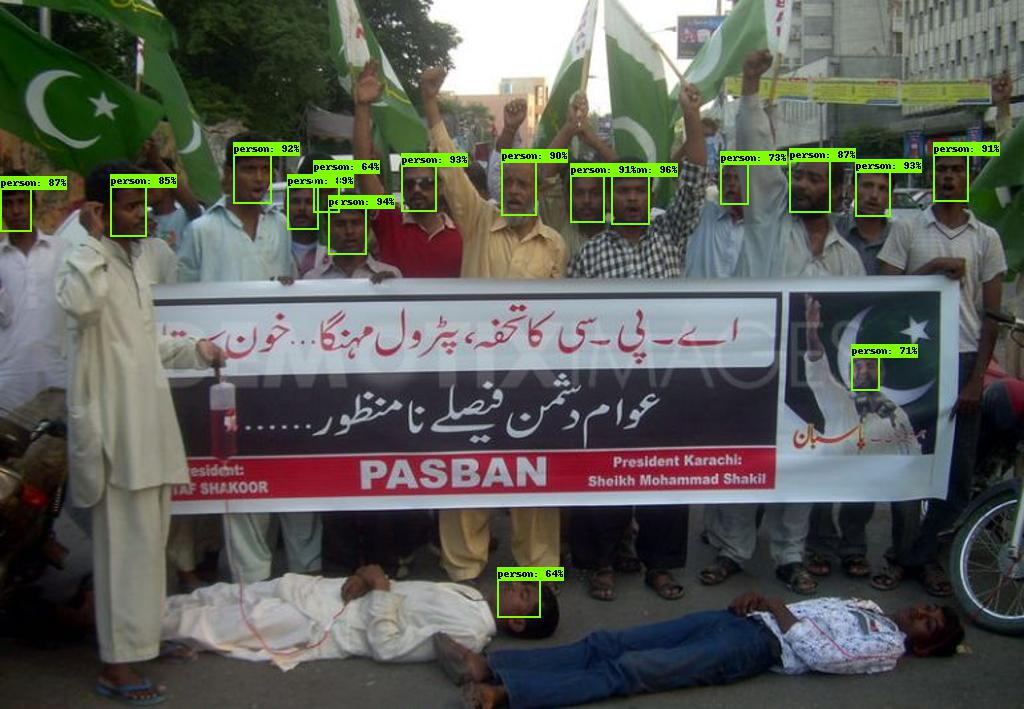

In [16]:
from IPython import display
display.display(display.Image(os.path.join(serve_image_out, '0.jpg')))